In [5]:
from sentence_transformers import SentenceTransformer,util

In [2]:
# Loading the sebrt pretrained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2') 

## Embedding the sentences

In [4]:

sentences = ['The quick brown fox jumps over the lazy dog', 
             'Dogs are a popular household pet around the world']
embeddings = model.encode(sentences)
for embedding in embeddings:
    print(embedding)

[ 6.18141890e-01 -2.47766539e-01 -2.35646963e-01 -1.10645741e-01
 -1.04881905e-01 -2.41441444e-01 -5.60290106e-02 -3.00354481e-01
 -2.29937658e-02  1.77720606e-01  2.20474347e-01  3.82652462e-01
  4.48558062e-01 -1.07466415e-01 -2.95623481e-01 -5.68135753e-02
 -3.91452789e-01  1.36096910e-01  1.37871012e-01  9.69042536e-03
 -2.35751495e-01 -5.08761644e-01 -2.31672525e-02  9.46922824e-02
 -7.72723436e-01 -1.64654881e-01 -7.71317244e-01 -4.58486110e-01
  1.26624003e-01 -3.72232944e-01  6.99772716e-01 -4.07931209e-01
 -4.35257405e-01 -7.20830977e-01 -7.07936049e-01  3.66328061e-01
 -4.00922418e-01 -1.83998287e-01 -1.25787169e-01  2.96749957e-02
 -1.53919384e-01  4.97117266e-02  1.04703978e-01  2.14557603e-01
 -6.93095922e-02  3.47619712e-01 -1.13453770e+00 -3.64123344e-01
  1.79999575e-01 -3.19598585e-01  1.38954163e-01  2.88711727e-01
 -2.80651122e-01  1.57439455e-01  7.94158399e-01  2.17849091e-02
  6.92501515e-02  1.28878400e-01 -2.73195654e-01  4.02935416e-01
  4.90770023e-03  2.49019

With SentenceTransformer('all-MiniLM-L6-v2') we define which sentence transformer model we like to load. In this example, we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over 1 billion training pairs.

BERT (and other transformer networks) output for each token in our input text an embedding. In order to create a fixed-sized sentence embedding out of this, the model applies mean pooling, i.e., the output embeddings for all tokens are averaged to yield a fixed-sized vector.

## Comparing Sentence Similarities
The sentences (texts) are mapped such that sentences with similar meanings are close in vector space. One common method to measure the similarity in vector space is to use cosine similarity. For two sentences, this can be done like this:

In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')
#Sentences are encoded by calling model.encode()
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("Have you seen my red cat?")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.6153]])


### Multiple sentences example-1
Finding top 5 similar pairs

In [15]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


### Multiple sentences example-2
Top 2 similar pairs

In [17]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']
#encode the sentences 
embeddings = model.encode(sentences, convert_to_tensor=True)
#compute the similarity scores
cosine_scores = util.cos_sim(embeddings, embeddings)
#compute/find the highest similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i] 
                                                             [j]})
#sort the scores in decreasing order 
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)
for pair in pairs[0:2]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i],
                                  sentences[j], pair['score']))

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6788


## Training our own Embeddings
Training your own sentence embeddings models for all type of use-cases is easy and requires often only minimal coding effort. For a comprehensive tutorial, see:- https://www.sbert.net/docs/training/overview.html



### Creating Networks from Scratch

In [18]:
from sentence_transformers import SentenceTransformer, models

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

c:\Users\Sandesh\Anaconda3\envs\sample\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Sandesh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Training Data
To represent our training data, we use the InputExample class to store training examples. As parameters, it accepts texts, which is a list of strings representing our pairs (or triplets). Further, we can also pass a label (either float or int). The following shows a simple example, where we pass text pairs to InputExample together with a label indicating the semantic similarity.

In [20]:
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
   InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

### Loss Functions
The loss function plays a critical role when fine-tuning the model. It determines how well our embedding model will work for the specific downstream task.

Sadly there is no “one size fits all” loss function. Which loss function is suitable depends on the available training data and on the target task.

To fine-tune our network, we need somehow to tell our network which sentence pairs are similar, and should be close in vector space, and which pairs are dissimilar, and should be far away in vector space.

The most simple way is to have sentence pairs annotated with a score indicating their similarity, e.g. on a scale 0 to 1. We can then train the network with a Siamese Network Architecture (for details see: Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks)

SBERT Siamese Network Architecture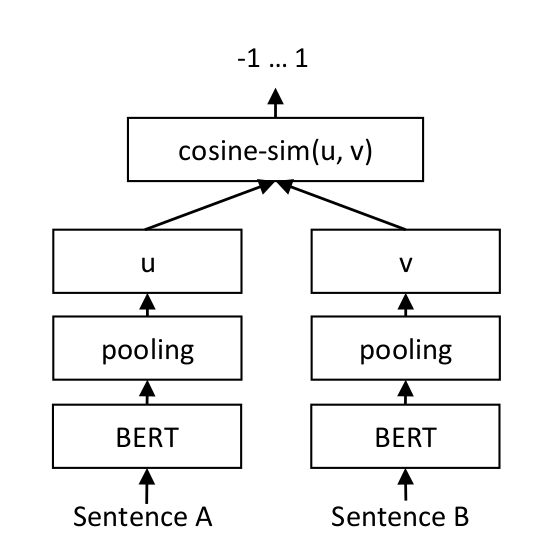

For each sentence pair, we pass sentence A and sentence B through our network which yields the embeddings u und v. The similarity of these embeddings is computed using cosine similarity and the result is compared to the gold similarity score. This allows our network to be fine-tuned and to recognize the similarity of sentences.

In [21]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

#Define the model. Either from scratch of by loading a pre-trained model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

#Define your train examples. You need more than just two examples...
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
    InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]

#Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

#Tune the model
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]

We tune the model by calling model.fit(). We pass a list of train_objectives, which consist of tuples (dataloader, loss_function). We can pass more than one tuple in order to perform multi-task learning on several datasets with different loss functions.

The fit method accepts the following parameter:
Parameters
model_name_or_path – If it is a filepath on disc, it loads the model from that path. If it is not a path, it first tries to download a pre-trained SentenceTransformer model. If that fails, tries to construct a model from Huggingface models repository with that name.

modules – This parameter can be used to create custom SentenceTransformer models from scratch.

device – Device (like ‘cuda’ / ‘cpu’) that should be used for computation. If None, checks if a GPU can be used.

cache_folder – Path to store models

use_auth_token – HuggingFace authentication token to download private models.

### Evaluators
During training, we usually want to measure the performance to see if the performance improves. For this, the sentence_transformers.evaluation package exists. It contains various evaluators which we can pass to the fit-method. These evaluators are run periodically during training. Further, they return a score and only the model with the highest score will be stored on disc.

The usage is simple:

In [22]:
from sentence_transformers import evaluation
sentences1 = ['This list contains the first column', 'With your sentences', 'You want your model to evaluate on']
sentences2 = ['Sentences contains the other column', 'The evaluator matches sentences1[i] with sentences2[i]', 'Compute the cosine similarity and compares it to scores[i]']
scores = [0.3, 0.6, 0.2]

evaluator = evaluation.EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)

# ... Your other code to load training data

model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100, evaluator=evaluator, evaluation_steps=500)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]